# Load Data into Dataframes and modify

In [1]:
from formulas import *
import formulas as fl
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline  

In [2]:
spy = pd.read_csv('SPY.csv')
dia = pd.read_csv('MSFT.csv')
qqq = pd.read_csv('TSLA.csv')
btc = yf.Ticker("BTC-USD").history(period="max")


spy['Date'] = pd.to_datetime(spy['Date'])
dia['Date'] = pd.to_datetime(dia['Date'])
qqq['Date'] = pd.to_datetime(qqq['Date'])



In [3]:

spy["day_return"] = spy["Close"].pct_change()
dia["day_return"] = dia["Close"].pct_change()
btc["day_return"] = btc['Close'].pct_change()

spy['log_day_return'] = np.log(spy['Close']) - np.log(spy['Close'].shift(1))
dia['log_day_return'] = np.log(dia['Close']) - np.log(dia['Close'].shift(1))

spy = spy.iloc[1:]
dia = dia.iloc[1:]
btc = btc.iloc[1:]


### Arima Model

In [4]:
from statsmodels.tsa.arima.model import ARIMA

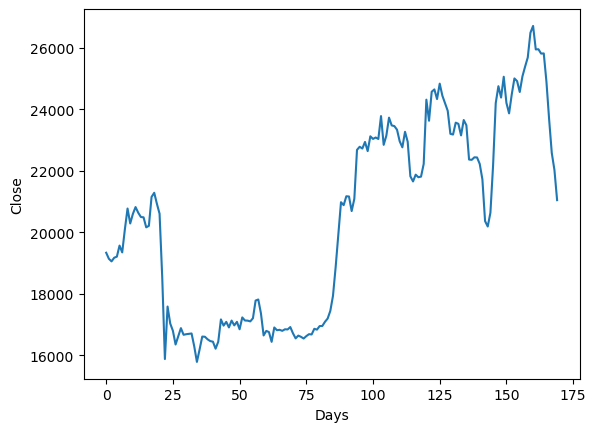

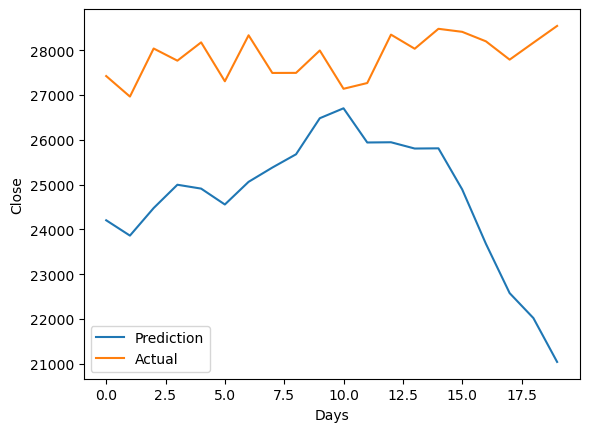

In [7]:
f=20
r=1
df = pd.DataFrame(btc.loc[:, 'Close'])
temp = list(df['Close'])
l = len(temp)
temp = temp[l-f-150:l-f]
dr=temp
# dr = [i-min(temp) for i in temp]


for i in range(r):
    model = ARIMA(dr, order=(100,1,1),enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=f)
    dr+=list(forecast)


plt.plot(dr)

plt.xlabel("Days")
plt.ylabel("Close")
plt.show()

plt.plot(dr[-f*r:], label='Prediction')
plt.plot(list(btc['Close'])[-f*r:], label='Actual')
plt.xlabel("Days")
plt.ylabel("Close")
plt.legend()
plt.show()

c:\Users\ronad\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ronad\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\ronad\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


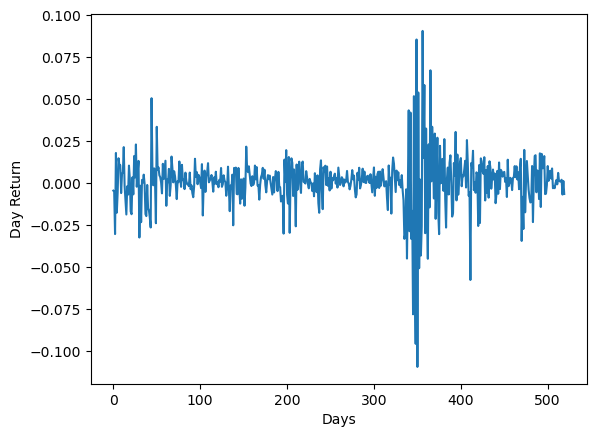

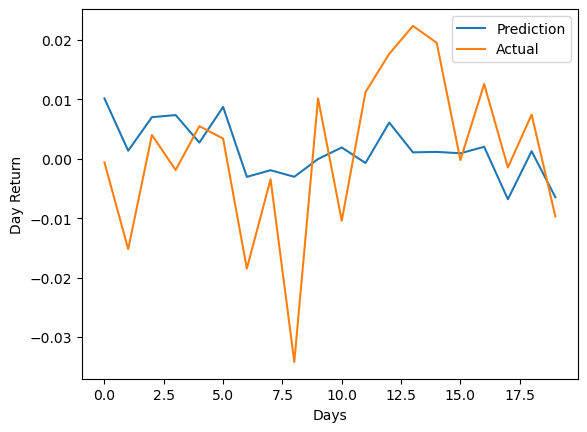

In [5]:
f=20
r=1
df = pd.DataFrame(spy.loc[:, 'day_return'])
temp = list(df['day_return'])
temp = temp[6479:6979]
dr=temp
# dr = [i-min(temp) for i in temp]


for i in range(r):
    model = ARIMA(dr, order=(60,1,5))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=f)
    dr+=list(forecast)


# plt.plot(spy['day_return'])
plt.plot(dr)

plt.xlabel("Days")
plt.ylabel("Day Return")
plt.show()

plt.plot(dr[-f*r:], label='Prediction')
plt.plot(list(spy['day_return'])[-f*r:], label='Actual')
plt.xlabel("Days")
plt.ylabel("Day Return")
plt.legend()
plt.show()

c:\Users\ronad\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ronad\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


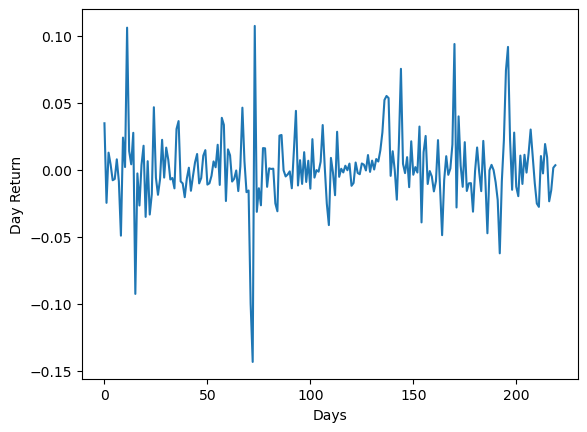

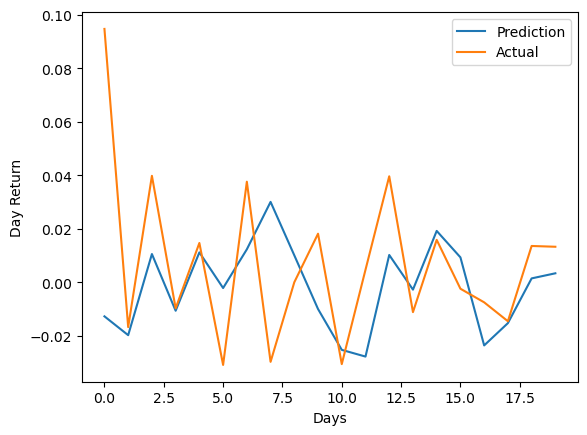

In [9]:
f=20
r=1
df = pd.DataFrame(btc.loc[:, 'day_return'])
temp = list(df['day_return'])
l = len(temp)
temp = temp[l-200-f:l-f]
dr=temp
# dr = [i-min(temp) for i in temp]



for i in range(r):
    model = ARIMA(dr, order=(100,1,5),enforce_stationarity=True, enforce_invertibility=False)
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=f)
    dr+=list(forecast)


plt.plot(dr)

plt.xlabel("Days")
plt.ylabel("Day Return")
plt.show()

plt.plot(dr[-f*r:], label='Prediction')
plt.plot(list(btc['day_return'])[-f*r:], label='Actual')
plt.xlabel("Days")
plt.ylabel("Day Return")
plt.legend()
plt.show()


In [22]:
test = list(btc['day_return'])[-20:]
pred = dr[-20:]

In [44]:

errList = []
for i in range(len(test)):
    diff = test[i]-pred[i]
    # diff = abs(diff)
    # err = (diff/test[i])*100
    # print(err)
    # errList.append(abs(err))
    errList.append(diff)
    

In [48]:
totalErr = sum(errList)/20

In [49]:
totalTest = sum(test)/20

In [50]:
totalTest

0.006962151932412808

In [51]:
totalErr

0.008533981182632646

In [54]:
100*(totalErr-totalTest)/totalTest

22.57677317988526

In [92]:
Y = []
y = []
for i in range(len(test)):
    diff = test[i]-pred[i]
    err = 100*(pred[i])/test[i]
    if abs(err)>500:
        continue
    print(err)
    y.append(pred[i])
    Y.append(test[i])

-13.39984462358981
118.01065603743845
26.610144603405622
109.37163556844592
76.10754989777024
6.847564103735731
32.82587905301363
-101.30888238917994
-54.75680760575902
82.55894893463326
25.843694359964356
24.42887528710333
121.09079137971607
-394.4518142534453
315.8406254100306
104.87984019944406
10.961978847927739
25.5101828997776


In [100]:
s = 0
for i in range(len(Y)):
    s += (Y[i]-y[i])**2
s = s/len(Y)
s = s**0.5
print(s)

0.033190276437111504


In [101]:
mae = 0
for i in range(len(Y)):
    mae += (Y[i]-y[i])
mae = mae/len(Y)
mae = mae**0.5
print(mae)

0.09076967079174189


In [102]:
1.96*s

0.06505294181673854

In [111]:
acc = []
for i in range(18):
    acc.append(abs((y[i] - Y[i])/Y[i]))

In [112]:
1 - np.mean(acc)

-0.011897821933176234

In [113]:
np.mean(acc)

1.0118978219331762

In [119]:
acc

[1.133998446235898,
 0.18010656037438452,
 0.7338985539659437,
 0.09371635568445932,
 0.23892450102229768,
 0.9315243589626427,
 0.6717412094698637,
 2.0130888238917994,
 1.5475680760575903,
 0.1744105106536674,
 0.7415630564003565,
 0.7557112471289668,
 0.21090791379716067,
 4.944518142534453,
 2.158406254100306,
 0.048798401994440625,
 0.8903802115207226,
 0.744898171002224]

In [124]:
np.mean([abs((1-acc[i])*100) for i in range(18)])

74.33888161579398

In [125]:
from sklearn import metrics

In [130]:
# MAE
metrics.mean_absolute_error(Y,y)

0.021262986934987668

In [131]:
# MSE
metrics.mean_squared_error(Y,y)

0.001101594449971879

In [132]:
# RMSE
np.sqrt(metrics.mean_squared_error(Y,y))

0.033190276437111504

In [136]:
# MAPE
metrics.mean_absolute_percentage_error(Y, y)

1.0118978219331762